Commmand Line Tool
==========================
`SeisFlows` is primarily interacted with via command line calls and a parameter file. In this page we explain how to use this command line tool to create a SeisFlows parameters file, edit and configure it, and establish a SeisFlows working directory. We also provide explanation for other command line options which act as helper utilities for improved package control.
 
After installing SeisFlows into a Conda environment, the `seisflows` command will be available directly from the command line. To access the help dialogue, you can type `seisflows` or `seisflows -h`

In [1]:
! seisflows

usage: seisflows [-h] [-w [WORKDIR]] [-p [PARAMETER_FILE]]
                 {setup,configure,swap,init,submit,resume,restart,clean,par,sempar,check,print,reset,debug,examples}
                 ...


                     SeisFlows: Waveform Inversion Package                      


optional arguments:
  -h, --help            show this help message and exit
  -w [WORKDIR], --workdir [WORKDIR]
                        The SeisFlows working directory, default: cwd
  -p [PARAMETER_FILE], --parameter_file [PARAMETER_FILE]
                        Parameters file, default: 'parameters.yaml'

command:
  Available SeisFlows arguments and their intended usages

    setup               Setup working directory from scratch
    configure           Fill parameter file with defaults
    swap                Swap module parameters in an existing parameter file
    init                Initiate working environment
    submit              Submit initial workflow to system
    resume              Re-submit p

### Setting up 
#### seisflows setup

The first step of any SeisFlows workflow is to setting up a parameter file. The `seisflows setup` command copies in a template parameter file.

In [3]:
%cd ~/Scratch
! rm *
! ls

/Users/Chow/Scratch


In [4]:
! seisflows setup -h

usage: seisflows setup [-h] [-f]

In the specified working directory, copy template parameter file containing
only module choices, and symlink source code for both the base and super
repositories for easy edit access. If a parameter file matching the provided
name exists in the working directory, a prompt will appear asking the user if
they want to overwrite.

optional arguments:
  -h, --help   show this help message and exit
  -f, --force  automatically overwrites existing parameter file


In [18]:
# The '-f' flag (overwrite) will overwrite any existing parameter file
! seisflows setup -f

creating parameter file: parameters.yaml


Having a look at the template `parameters.yaml` file that was just generated, we can see that it contains some pre-defined default values for the core SeisFlows modules. Each of these modules defines it's own set of unique parameters which make up a workflow.

In [19]:
! ls
! wc -l parameters.yaml  # List the number of lines in the file

parameters.yaml sflog.txt
      30 parameters.yaml


In [20]:
! cat parameters.yaml

# //////////////////////////////////////////////////////////////////////////////
#
#                        SeisFlows YAML Parameter File
#
# //////////////////////////////////////////////////////////////////////////////
#
# Modules correspond to the structure of the source code, and determine
# SeisFlows' behavior at runtime. Each module requires its own sub-parameters.
#
# .. rubric::
#   - To determine available options for modules listed below, run:
#       > seisflows print modules
#   - To auto-fill with docstrings and default values (recommended), run:
#       > seisflows configure
#   - To set values as NoneType, use: null
#   - To set values as infinity, use: inf
#
#                                    MODULES
#                                    ///////
# workflow (str):    The types and order of functions for running SeisFlows
# system (str):      Computer architecture of the system being used
# solver (str):      External numerical solver to use for waveform simulations
# pr

#### seisflows configure

We can now run the `seisflows configure` command which will build out our parameter file based on the module choices provided in the parameter file.

In [8]:
! seisflows configure -h

usage: seisflows configure [-h] [-a]

SeisFlows parameter files will vary depending on chosen modules and their
respective required parameters. This function will dynamically traverse the
source code and generate a template parameter file based on module choices.
The resulting file incldues docstrings and type hints for each parameter.
Optional parameters will be set with default values and required parameters
and paths will be marked appropriately. Required parameters must be set before
a workflow can be submitted.

optional arguments:
  -h, --help            show this help message and exit
  -a, --absolute_paths  Set default paths relative to cwd


In [21]:
! seisflows configure

In [22]:
! head -200 parameters.yaml | tail -n 82  # have a look at the middle of the file
! echo
! wc -l parameters.yaml

#    :param smooth_v: Gaussian half-width for vertical smoothing in units
#        of meters.
#    :type components: str
#    :param components: components to consider and tag data with. Should be
#        string of letters such as 'RTZ'
#    :type solver_io: str
#    :param solver_io: format of model/kernel/gradient files expected by the
#        numerical solver. Available: ['fortran_binary': default .bin files].
#        TODO: ['adios': ADIOS formatted files]
#    :type source_prefix: str
#    :param source_prefix: prefix of source/event/earthquake files. If None,
#        will attempt to guess based on the specific solver chosen.
#    :type mpiexec: str
#    :param mpiexec: MPI executable used to run parallel processes. Should also
#        be defined for the system module
#
#        
#    Solver SPECFEM2D
#    ----------------
#    SPECFEM2D-specific alterations to the base SPECFEM module
#
#    Parameters
#    ----------
#    :type source_prefix: str
#    :param source_prefix: Pr

We can see that our parameter file is over 300 lines, a bit too cumbersome to print on the page. The length of the file mostly arises from the header, as each parameter gets it's own entry with the parameter's type, docstring, and any available options. Each set of parameters are separated by their relevant module, and their respective docstrings should help users understand how and when they are used in a SeisFlows workflow.

>__NOTE__: Many parameters have sensible default values chosen, but it is up to the user to decide which parameters are relevant to them, and how they would like them set. Internal check functions throughout the package will raise AssertionErrors for incorrectly or improperly set parameters.

### Editing the parameter file
#### seisflows par

You can always open your favorite text editor to make changes to the parameter file, however the `seisflows par` command makes things easier by allowing you to view and edit values from the command line. This makes it convenient to change parameters quickly and allows you to script your parameter file setup for improved reproducibility. 

In [23]:
! seisflows par -h

usage: seisflows par [-h] [-p] [parameter] [value]

Directly edit values in the parameter file by providing the parameter and
corresponding value. If no value is provided, will simply print out the
current value of the given parameter. Works also with path names.

positional arguments:
  parameter         Parameter to edit or view, (case independent).
  value             Optional value to set parameter to. If not given, will
                    print out current parameter. If given, will replace
                    current parameter with new value. Set as 'null' for
                    NoneType and set '' for empty string

optional arguments:
  -h, --help        show this help message and exit
  -p, --skip_print  Skip the print statement which is typically sent to stdout
                    after changing parameters.


The call structure of the `par` command is provided in the help message:

> seisflows par [parameter] [value (optional)]

We can view parameters by providing a single 'parameter' argument to the `par` command

In [24]:
! seisflows par ntask  # ntask is the number of tasks/events to be run during a workflow

ntask: 1


We can change a given parameter from it's original value by providing a second 'value' argument

In [25]:
! seisflows par ntask 3

ntask: 1 -> 3


#### seisflows sempar

The `seisflows sempar` command behaves the same as the `par` command, except is used to edit a SPECFEM2D/3D/3D_GLOBE Par_file. It has the same call structure as `par`.

#### seisflows check

Each module contains it's own internal set of parameter checks which make sure that reasonable parameter values and types have been chosen. This is especially important when submitting large jobs on clusters as the `check` function will allow the User to catch errors without having to wait on queue times or waste computational resources.

In [26]:
! seisflows check


                                PARAMETER ERRROR                                
                                ////////////////                                
`path_specfem_bin` must exist and must point to directory containing SPECFEM
executables


Here we can see that a given path has not been set correctly in the parameter file.

#### seisflows swap

The `seisflows swap` command allows you to swap out a set of module parameters without affecting other parts of the parameter file. Some cases for when this might be useful include switching from a 'workstation' system to a 'cluster' system, or swapping solvers from 'specfem2d' to 'specfem3d'.

In [1]:
! seisflows swap -h

usage: seisflows swap [-h] [module] [classname]

During workflow development, it may be necessary to swap between different
sub-modules (e.g., system.workstation -> system.cluster). However this would
typically involving re-generating and re-filling a parameter file. The 'swap'
function makes it easier to swap parameters between modules.

positional arguments:
  module      Module name to swap
  classname   Classname to swap to

optional arguments:
  -h, --help  show this help message and exit


### Running workflows
#### seisflows submit

To run SeisFlows, we use the `submit` call. This will submit the `workflow` to the `system` and continue until a User-defined stop criteria is met. 

Under the hood, the `submit` function will differ depending on the chosen `system`. For Users running on laptops and workstations, `submit` will simply launch a Python process and step through the tasks in the `workflow` task list. On clusters, `submit` will launch a master job on a compute node, which will itself step through tasks in the task list, ensuring that no processing is run on login nodes. 

In [2]:
! seisflows submit -h

usage: seisflows submit [-h] [-s STOP_AFTER]

The main SeisFlows execution command. Submit a SeisFlows workflow to the
chosen system, equal to executing seisflows.workflow.main(). This function
will create and fill the working directory with required paths, perform path
and parameter error checking, and establish the active working environment
before executing the workflow.

optional arguments:
  -h, --help            show this help message and exit
  -s STOP_AFTER, --stop_after STOP_AFTER
                        Optional override of the 'STOP_AFTER' parameter


#### seisflows clean

The `clean` function is used to clear an existing working directory. It deletes all SeisFlows created files and directories using paths in the parameter file, but does not delete the parameter file itself. Use the ``-f/--force`` flag to skip over the 'are you sure?' check statement.

In [4]:
! seisflows clean -h 

usage: seisflows clean [-h] [-f]

Delete all SeisFlows related files in the working directory, except for the
parameter file.

optional arguments:
  -h, --help   show this help message and exit
  -f, --force  Skip the warning check that precedes the clean function


#### seisflows restart 

The `restart` function is a convenience function which wraps `clean` and `submit`. It is used to restart workflows using the same parameter file. It also takes the ``-f/--force`` flag that the clean function defines.

In [6]:
! seisflows restart -h

usage: seisflows restart [-h] [-f]

Akin to running seisflows clean; seisflows submit. Restarts the workflow by
removing the current state and submitting a fresh workflow.

optional arguments:
  -h, --help   show this help message and exit
  -f, --force  Skip the clean warning check statement


### Plotting

#### seisflows plot2d

`plot2d` allows you to quickly plot SPECFEM2D models, kernels and gradients which have been exported to disk during a SeisFlows workflow. From a SeisFlows working directory the format for running `plot2d` is provided in the help message.

In [2]:
# a directory where we have run example #2
%cd ~/Work/scratch/  
! ls

/home/bchow/Work/scratch
logs	parameters.yaml  sflog.txt    specfem2d
output	scratch		 sfstate.txt  specfem2d_workdir


In [3]:
! seisflows plot2d -h

usage: seisflows plot2d [-h] [-c [CMAP]] [-s [SAVEFIG]] [name] [parameter]

Plots model/kernels/gradient files located in the output/
        directory. ONLY available for SPECFEM2D models.

positional arguments:
  name                  Name of directory in the output/ directory
  parameter             Name of parameter to plot from `name`. E.g., 'vs',
                        'vp' etc.

optional arguments:
  -h, --help            show this help message and exit
  -c [CMAP], --cmap [CMAP]
                        colormap to be passed to PyPlot
  -s [SAVEFIG], --savefig [SAVEFIG]
                        optional name and path to save figure


Running `plot2d` without any arguments will print out a list of available directories you can plot

In [4]:
! seisflows plot2d 

                                     PLOT2D                                     
                                     //////                                     
Available models/gradients/kernels

GRADIENT_01
MODEL_01
MODEL_INIT
MODEL_TRUE


Users will also have to choose which parameter they would like to plot, which is defined by the available parameters in the underlying model. Incorrect choices will throw an AssertionError which will tell you what parameters are available to plot.

In [5]:
! seisflows plot2d GRADIENT_01

Traceback (most recent call last):
  File "/home/bchow/miniconda3/envs/docs/bin/seisflows", line 33, in <module>
    sys.exit(load_entry_point('seisflows', 'console_scripts', 'seisflows')())
  File "/home/bchow/REPOSITORIES/seisflows/seisflows/seisflows.py", line 1298, in main
    sf()
  File "/home/bchow/REPOSITORIES/seisflows/seisflows/seisflows.py", line 410, in __call__
    getattr(self, self._args.command)(**vars(self._args))
  File "/home/bchow/REPOSITORIES/seisflows/seisflows/seisflows.py", line 1021, in plot2d
    save=savefig)
  File "/home/bchow/REPOSITORIES/seisflows/seisflows/tools/specfem.py", line 428, in plot2d
    f"chosen `parameter` must be in {self._parameters}"
AssertionError: chosen `parameter` must be in ['vp_kernel', 'vs_kernel']


In [12]:
! seisflows plot2d GRADIENT_01 vs_kernel --savefig gradient_01_vs_kernel.png

Figure(707.107x707.107)


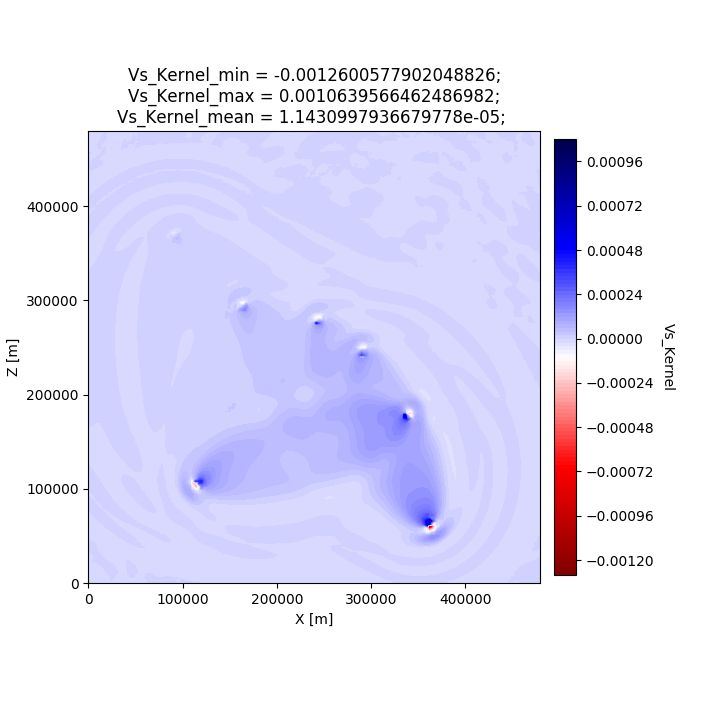

In [13]:
from IPython.display import Image
Image(filename='gradient_01_vs_kernel.png') 